# MS263  April 25, 2017 - Week11

* [Filtering and convolution](#Filtering-and-Convolution)
* [Image Analysis](#Image-Analysis)
* [Image Analysis and convolution: An example](#Image-analysis-and-convolution)

## Filtering and Convolution

__Convolution__ is a process of blending two functions together to create a third. The convolution of two functions $f$ and $g$ is symbolized mathematically as $(f * g)$.

### Convolution steps

For each point in $f$:
1. Flip $g$ around
2. Take product of $f$ and $g$ at all overlapping location times
3. Add the resulting values together
4. Move on to next point in $f$, repeat for different lag between $f$ and $g$

This process is very similar to the procedures for cross-covariance of two functions $f$ and $g$, and auto-covariance of a single function $g$ with itself. 

<img src='images/convolution2.png' width="600">
source: https://en.wikipedia.org/wiki/Convolution

Expressing this procedure mathematically for two time series $f(t)$ and $g(t)$:

- $f$ has M samples, $f_k$ where k = 1,2,3...M
- $g$ has N samples, $g_i$ where i = 1,2,3...N
    
$ (f * g)_j = \sum_{k=1}^M g_{j-k} f_k $
    
The resulting function has N+M-1 points.

### Filtering

One of the common applications of convolution is *smoothing* data. Smoothing is used in time series analysis and image analysis to suppress noise or high-frequency variability. Another term for smoothing is *low-pass filter* becuase it suppresses high-frequency variability and allows low-frequency variability to pass through.

One of the most common and intuitive smoothing operations is the __running Average__ (or *Box Car filter*). This involves taking the average over a certain block (30 hrs, 5 days ... etc), then moving forward in time and repeating the same process for the next segment of data.

Filtering is a type of convolution where
- $f$ is a time series (observations)<br>
- $g$ is a set of weights (filter)

For a running average, the weights in $g$ are all identical and sum to one. If you plot the weights, the look like a rectangle, or "box car" shape.

Another common filtering method is the __Hanning filter__, which is a raised cosine function. All the values are positive (and sum to 1). This weights nearby points more than those that are farther away. Choosing the best filter for a certain situation is a major topic in digital signal processing.

### What makes an ideal low pass filter? 

*Note:* Images in this section come from the excellent source at http://www.labbookpages.co.uk/audio/firWindowing.html

For white noise (equal energy at all frequencies) <br>
* all energy in low frequencies (__pass band__) retrained<br>
* all energy in high frequencies (__stop band__) removed<br>

<img src='images/filtering2.png' width="450">

Image source: http://www.labbookpages.co.uk/audio/firWindowing.html

__Ideal filter__ <br>
Assuming an infinite time series, the filter would look like a sinc function:<br>
- sinc function is the FFT of a step function 
- convolving the sinc function with an infinitely long time series of white noise would give the step function in frequency content shown above
- A sinc function would require an infinite number of weights (__this is NOT practical__)
<img src='images/filtering3.png' width="450">

Image source: http://www.labbookpages.co.uk/audio/firWindowing.html

__Practical filter__ <br>
Ideal filter tapered off a the edges with a window <br>
<img src='images/filtering4.png' width="450">

Image source: http://www.labbookpages.co.uk/audio/firWindowing.html

__ Spectral characteristics of filters __ <br>
Spectrum of white nose using this approach with two window types (box car and Hamming): <br>
- Ripples in frequency response of rectangular box car window (spectral leakage)<br>
- Hamming window has less ripples but a broader transition range (trade-off)<br>

<img src='images/filtering6.png' width="800">

Image source: http://www.labbookpages.co.uk/audio/firWindowing.html

__dB - decibels __: logogrithmic unit used to describe attenuation (reduction of energy)

$$ dB = 10 \log_{10}\left(\frac{A^2}{A_0^2}\right) $$ Where $ A_0 $ is a reference amplitude


<img src='images/filtering7.png' width="800">

Image source: http://www.labbookpages.co.uk/audio/firWindowing.html

## Common oceanographic filters
__Cosine-Lanczos Filter__
- "Lancz7" filter: designed to filter out energy at diurnal and tidal fequencies
- Half amplitude period = 34.29 hours
- Half amplitude frequency = 0.7 cpd
<img src='images/cos_lanc.png' width="300">

__PL64 Weights __
<img src='images/PL64.png' width="300">

source: CODE-2 Moored Array and Large-Scale Data Report, WHOI Tech. Rep. 85-35

### Take Home Points: filtering <br>

- Boxcar filters (running averages) are simple but not very effective

- A normalized Hanning window improves on the boxcar by soothing out the abrupt edges

- More sophisticated filters (e.g. cosine-Lanczos) get closer to an ideal spectral response but require a large number of weights; not practical for shorter time series

## Image Analysis

### Ways of representing an image (or color) as a number
- __Binary__: Each pixel has a value of 0 or 1 (black or white)
- __grayscale__: Each pixel has a value between 0 and 255 (black is 0 white is 255) Each pixel has 8-bits of data ($2^8$)
- __RGB__: storing a value for each pixel as three component colors - Red, Green, Blue
Each pixel has three 8 bit values. All colors combined corresponds to white
- __CMYK__: Uses Cyan - Magenta - Yellow and combining colors makes Black (this is used more for printing)
<img src='images/colors.png' width="600">
__But__ CMYK is a subset of RGB, so you cant always print what is on the screen
<img src='images/colors2.png' width="500">

Source: https://www.mgxcopy.com/blog/san-diego-printing/2012/05/01/rgb-vs-cmyk-colorspace-why-its-important-to-use-cmyk-for-printing

One simple way of transforming from CMY to RGB:<br>
C = 255 - R<br>
M = 255 - G<br>
Y = 255 - B<br>

#### Hue, Saturation, Intensity (or lightness)

Another way of representing colors with three numbers

<img src='images/hue_sat_ints.png' width="300">


## Image analysis and convolution

### An example in Python

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [3]:
file = 'images/squid.jpg'
pic = Image.open(file,'r')

In [4]:
print('W:',pic.width)
print('H:',pic.height)

W: 4033
H: 2342


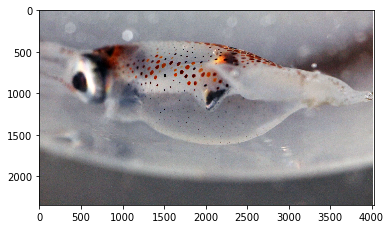

In [5]:
plt.figure()
plt.imshow(pic)

In [6]:
print(pic.format)
print(pic.size)
print(pic.mode)

JPEG
(4033, 2342)
RGB


### Color transformations

The image can be thought of as a three-dimensional matrix, with a value for each x-position, y-position and RGB colors.

In [7]:
print(np.shape(pic))

(2342, 4033, 3)


Multiplying the image matrix by a 3 $\times$ 3 matrix can be used to transfer the values from one color to another.

| |R|G|B|
|-|-|-|-|
|R| | | |
|G| | | |
|B| | | |


In [8]:
parr = np.asarray(pic)
np.shape(parr)
transform = np.array(([1,0,0],
                      [0,0,1],
                      [0,1,0]))

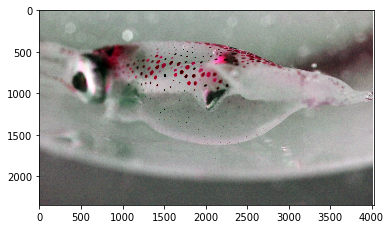

In [9]:
ptrans = np.dot(parr,transform)
plt.figure()
plt.imshow(ptrans)

In [10]:
parr = np.asarray(pic)
np.shape(parr)
transform = np.array(([0,1,0],
                      [1,0,0],
                      [0,0,1])) 

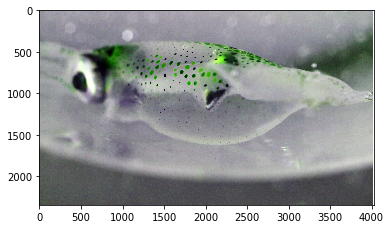

In [11]:
ptrans = np.dot(parr,transform)
plt.figure()
plt.imshow(ptrans)

#### Transform to the negative

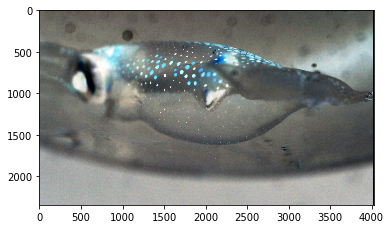

In [12]:
neg = 255 - parr 
plt.figure()
plt.imshow(neg)

#### Transform to Grayscale

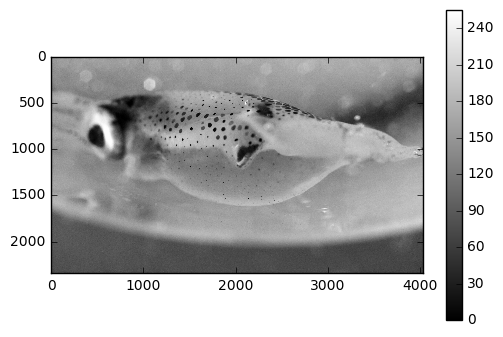

In [12]:
pgray = pic.convert('L')
pgarr = np.asarray(pgray)
plt.figure()
ax = plt.imshow(pgray, cmap='gray')
plt.colorbar()

#### Cropping the image

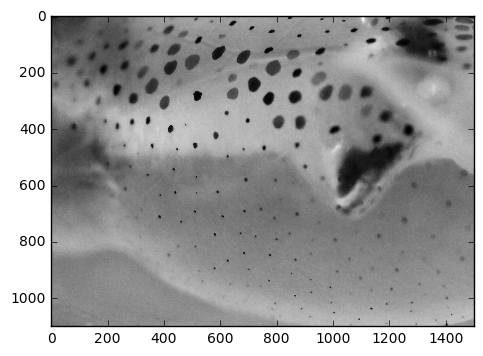

In [13]:
pcrop = pgray.crop(box=(1000,500,2500,1600))
plt.figure()
plt.imshow(pcrop,cmap='gray')

#### Histogram of the grayscale values

(2342, 4033)


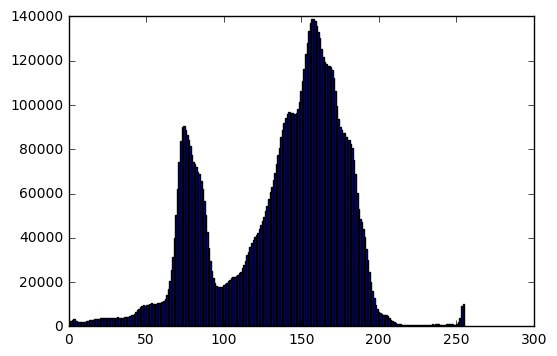

In [14]:
print(np.shape(pgarr))
plt.hist(pgarr.flatten(),bins=256);

#### Gamma corrections
if the original image is $f(x,y)$,

$g(x,y) = c[f(x,y)]^\gamma$

A value of $\gamma$ below 1 shifts the relative distribution of colors towards lighter values.

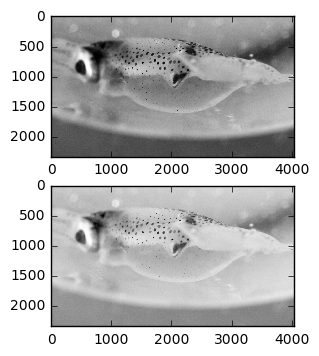

In [15]:
plt.figure(1)
plt.subplot(211)

plt.imshow(pgarr,cmap='gray')
plt.subplot(212)

plt.imshow(pgarr**.5,cmap='gray')
plt.show()

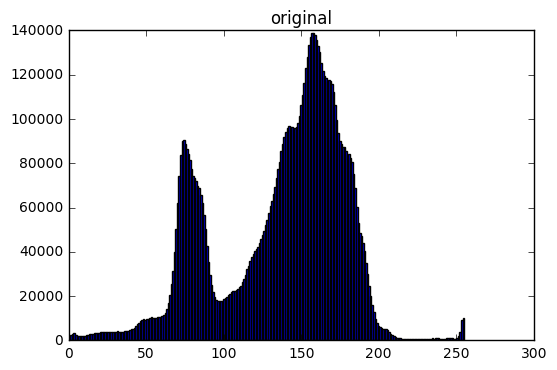

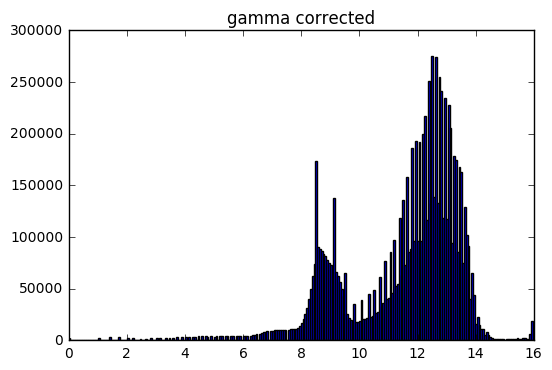

In [16]:
plt.figure()
plt.hist(pgarr.flatten(),bins=256);
plt.title('original')
plt.figure()
plt.hist((pgarr**.5).flatten(),bins=256);
plt.title('gamma corrected')

### Smoothing

As in time series analysis, the simplest filter for a 2D image is a running average of surrounding points in some interval. In this case the filter is 2D. A 3 $\times$ 3 running average can be obtained by convolving the image matrix with this matrix:

| 1 | 1 | 1 |
|---|---|---|
| 1 | 1 | 1 |
| 1 | 1 | 1 |

This can be created in Python using the `np.ones()` function.

In [33]:
filt = np.ones([3,3])
print(filt)

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


In [18]:
filtnorm = filt/np.sum(filt)
print(filtnorm)

[[ 0.00308642  0.00308642  0.00308642  0.00308642  0.00308642  0.00308642
   0.00308642  0.00308642  0.00308642  0.00308642  0.00308642  0.00308642
   0.00308642  0.00308642  0.00308642  0.00308642  0.00308642  0.00308642]
 [ 0.00308642  0.00308642  0.00308642  0.00308642  0.00308642  0.00308642
   0.00308642  0.00308642  0.00308642  0.00308642  0.00308642  0.00308642
   0.00308642  0.00308642  0.00308642  0.00308642  0.00308642  0.00308642]
 [ 0.00308642  0.00308642  0.00308642  0.00308642  0.00308642  0.00308642
   0.00308642  0.00308642  0.00308642  0.00308642  0.00308642  0.00308642
   0.00308642  0.00308642  0.00308642  0.00308642  0.00308642  0.00308642]
 [ 0.00308642  0.00308642  0.00308642  0.00308642  0.00308642  0.00308642
   0.00308642  0.00308642  0.00308642  0.00308642  0.00308642  0.00308642
   0.00308642  0.00308642  0.00308642  0.00308642  0.00308642  0.00308642]
 [ 0.00308642  0.00308642  0.00308642  0.00308642  0.00308642  0.00308642
   0.00308642  0.00308642  0.00308

Convolution also works in two dimensions.

In [26]:
from scipy.signal import convolve2d
filt = np.ones([50,50])
filtnorm = filt/np.sum(filt)
psmooth = convolve2d(pgarr,filtnorm)

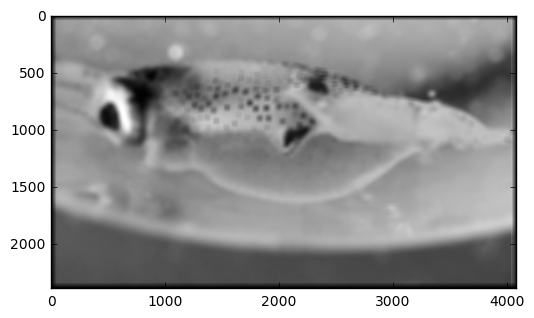

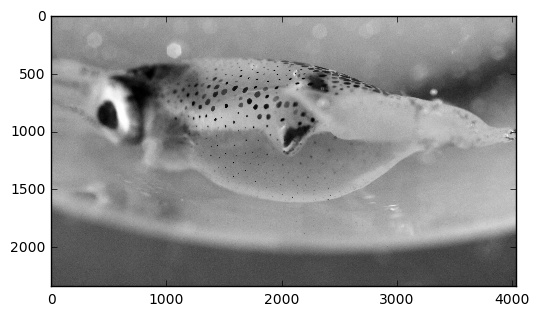

In [27]:
plt.figure()
plt.imshow(psmooth,cmap='gray')
plt.figure()
plt.imshow(pgarr,cmap='gray')

Plotting a horizontal slice of grayscale values in the two images above. There is clearly less small-scale variability in the smoothed version. The smoothed version also has some slightly different features because it is incorporating information from the vertical dimension through the averaging process.

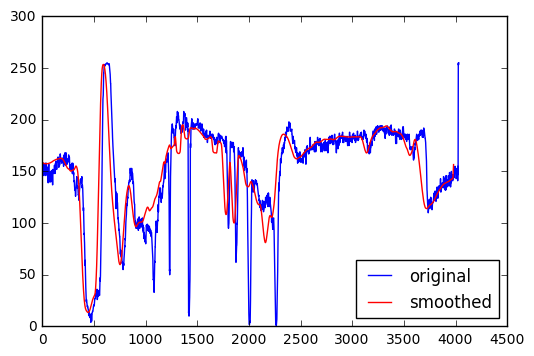

In [29]:
plt.figure()
plt.plot(pgarr[900,:],'b') 
plt.plot(psmooth[900,50:-50],'r') 
plt.legend(['original','smoothed'],loc='best')

### Making monochromatic image from a threshold value

Why smooth an image and lose the detail in the original?

One reason is for detecting features. One way of doing this is to use a threshold value to differentiate regions of different lightness and darkness. Doing this type of analysis on the smoothed version of the image highlights only the larger scale features and less small-scale noise (like near the bottom).

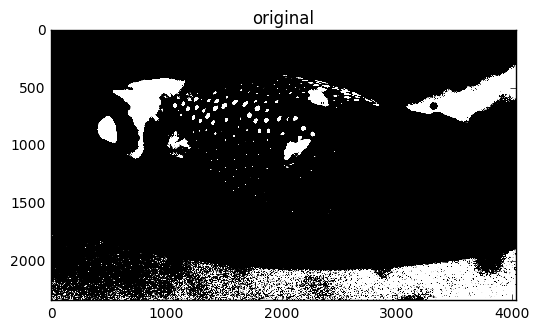

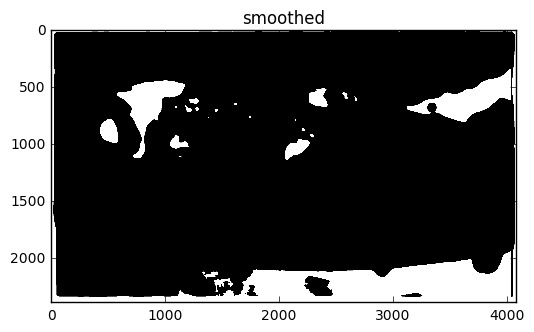

In [32]:
pthresh = pgarr/255 <0.3
plt.figure()
plt.imshow(pthresh,cmap='gray')
plt.title('original')
pthreshs = psmooth/255 <0.3
plt.figure()
plt.imshow(pthreshs,cmap='gray')
plt.title('smoothed')

### Edge Detection 

Detection of edges can be based on how sharp the gradients are (differences in adjacent values).

This requires an estimate of the spatial derivative in both directions ($x$ and $y$). These two components can be estimated from discrete data as:

x derivative (horizontal component) = $\frac{df}{dx} = \frac{f(x + \Delta x)-f(x - \Delta x)}{2 \Delta x}$ <br>

y derivative (vertical component) = $\frac{df}{dy} = \frac{f(y + \Delta y)-f(y - \Delta y)}{2 \Delta y}$ <br>

The __gradient vector__ $\nabla f = \left(\frac{df}{dx}, \frac{df}{dy}\right) $ has both magnitude and direction.

$\left|\nabla f \right| = \sqrt{\left(\frac{df}{dx}\right)^2 + \left(\frac{df}{dy}\right)^2}$


The $x$ derivative can be computed by convolving the imagae matrix with a matrix for $\frac{d}{dx}$ in the nearby area.

| -1 | 0 | 1 |
|----|---|---|
| -1 | 0 | 1 |
| -1 | 0 | 1 |


The $y$ derivative can be computed by convolving the imagae matrix with a matrix for $\frac{d}{dy}$ in the nearby area.

| 1 | 1 | 1 |
|----|---|---|
| 0 | 0 | 0 |
| -1 | -1 | -1 |

In [23]:
ddx = [[-1,0,1],
       [-1,0,1],
       [-1,0,1]]

ddy = [[-1,-1,-1],
       [0,0,0],
       [1,1,1]]

In [24]:
dpdx = convolve2d(pcrop,ddx)
dpdy = convolve2d(pcrop,ddy)
pgrad = np.sqrt(dpdx**2 + dpdy**2)

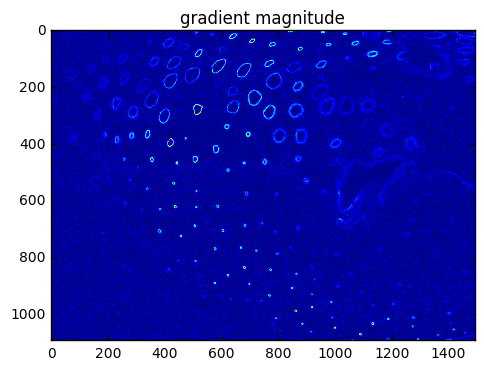

In [34]:
plt.figure()
plt.imshow(pgrad[5:-5,5:-5])
plt.title('gradient magnitude')

#### Sobel filter

This is a commonly-used method for computing gradients that is similar, but gives more weight to nearby points.

$x$ derivative:

| -1 | 0 | 1 |
|----|---|---|
| -2 | 0 | 2 |
| -1 | 0 | 1 |


$y$ derivative:

| 1 | 2 | 1 |
|----|---|---|
| 0 | 0 | 0 |
| -1 | -2 | -1 |